# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Set temp units 
temp_units = "imperial"

#Set weather api url 
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0])

637
kieta


In [3]:
#Set Query for URL 
query = base_url + cities[0]
query

'http://api.openweathermap.org/data/2.5/weather?appid=a2be38c9e2a07990378f6221fcbfaf7c&units=imperial&q=kieta'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Set variables for the list
city_data = []
country = []
lat = []
lng = []
date = []
humidity = []
cloudiness = []
max_temp = []
wind_speed = []

#Set record and count 
record_count = 0
set_count = 1

#Set Loops and responses.

#print data retreival 
print('''Beginning Data Retrieval     
-----------------------------''')

#Set loop and append responses to the list above. 

for city in cities: 
    
    query = base_url + city 
    response = requests.get(query).json()
    
    try: 
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        if record_count > 49: 
            record_count = 1 
            set_count += 1
            city_data.append(city) 
            print(f'Processing Record {record_count} of Set {set_count} | {city}')
        else: 
            record_count += 1 
            city_data.append(city)
            print(f'Processing Record {record_count} of Set {set_count} | {city}')

    except Exception: 
        print(f"City not found. Skipping...")
        


print(f'''-----------------------------
Data Retrieval Complete      
-----------------------------''')


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kieta
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | te anau
Processing Record 5 of Set 1 | biak
Processing Record 6 of Set 1 | tautira
City not found. Skipping...
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | guamuchil
Processing Record 14 of Set 1 | los llanos de aridane
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | vostok
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kloulklubed
Processing Record 21 of Set 1 | canto do buriti
Processing Record 22 of Set 1 | mahebourg

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Covert into dataframe
weather_data = pd.DataFrame({"City": city_data, 
                            "Country": country,
                             "Lat": lat, 
                             "Lng": lng,
                             "Date": date,
                             "Max Temp": max_temp, 
                             "Cloudiness": cloudiness, 
                             "Wind Speed": wind_speed,
                             "Humidity": humidity
                            })
weather_data.count()

#Save dataframe
weather_data.to_csv("output_data/cities.csv", index=False, header=True)


In [6]:
# Display data in data frame
weather_data.head()

,City,Country,Lat,Lng,Date,Max Temp,Cloudiness,Wind Speed,Humidity
0,kieta,PG,-6.22,155.63,1597107989,85.14,91,1.86,63
1,bluff,NZ,-46.60,168.33,1597107989,52.00,91,14.00,73
2,georgetown,MY,5.41,100.34,1597107989,84.20,20,2.24,88
3,te anau,NZ,-45.42,167.72,1597107989,47.79,18,5.73,68
4,biak,ID,-0.91,122.88,1597107990,81.37,48,4.99,75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

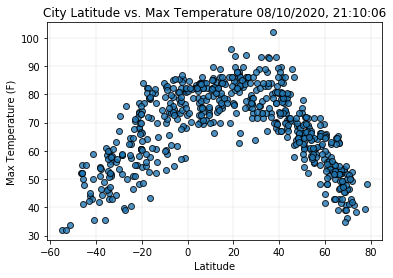

In [7]:
#Set date and time 
named_tuple = time.localtime() 
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)

#Plt the scatter graph. 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], alpha=0.8, marker='o', 
           edgecolor="black")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title(f'City Latitude vs. Max Temperature {time_string}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Max Temperature (F)')

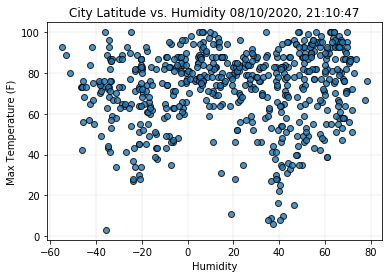

In [8]:
#Set date and time 
named_tuple = time.localtime() 
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)

#Plt the scatter graph. 
plt.scatter(weather_data["Lat"], weather_data["Humidity"], alpha=0.8, marker='o', 
           edgecolor="black")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title(f'City Latitude vs. Humidity {time_string}')
plt.xlabel('Humidity')
plt.ylabel('Max Temperature (F)')

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

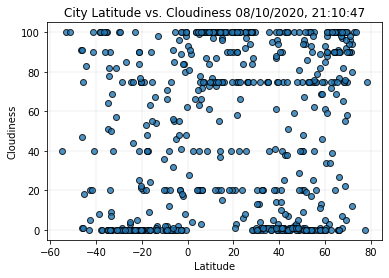

In [10]:
#Plt the scatter graph. 
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], alpha=0.8, marker='o', 
           edgecolor="black")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title(f'City Latitude vs. Cloudiness {time_string}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

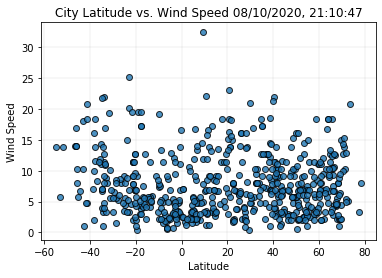

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], alpha=0.8, marker='o', 
           edgecolor="black")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.title(f'City Latitude vs. Wind Speed {time_string}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

#Define the linear regression function 
def plot_linear_regression(x_values, y_values, title, text_coordinates): 
    
    #Run linear regression 
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Plot the scatter plot.
    plt.scatter(x_values, y_values)
    
    #Plot the regression line. 
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    #Label plot 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    #Print r-square value 
    print(f"R squard: {rvalue}")
    
    #Show plot 
    plt.show()


In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[(weather_data["Lat"]>= 0)]
southern_hemisphere = weather_data.loc[(weather_data["Lat"]< 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.7735830149948486


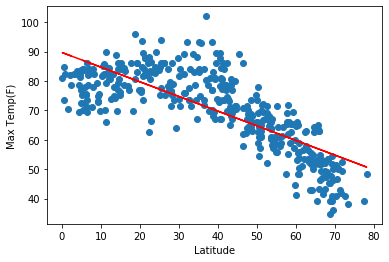

In [14]:
# Plot the regression for Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Set x and y coordinates
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp(F)', (6,30))

##### As displayed on the graph and the high r value there is a strong negative correlation between Max Temp and Latitude in the northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.7504587217587135


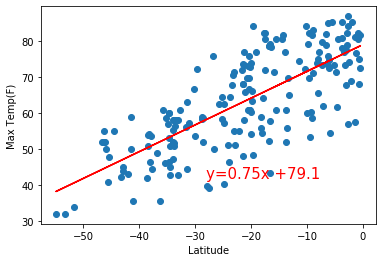

In [15]:
# Plot regression Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Set x and y coordinates
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

plot_linear_regression(x_values, y_values, 'Max Temp(F)', (-28,42))

##### As displayed on the graph and the high r value there is a mediocre positive correlation between Max Temp and Latitude in the southern hemisphere. 

##### Overall, there is a strong correlation interms of Max Temp and the hemispheres

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: -0.043545852172042314


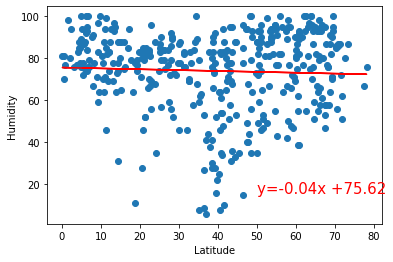

In [16]:
# Set x and y coordinates
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

plot_linear_regression(x_values, y_values, 'Humidity', (50,16))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.04503516252906044


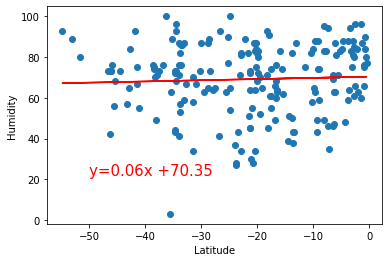

In [17]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

plot_linear_regression(x_values, y_values, 'Humidity', (-50,22))

###### As evident on the graph and in the r value the correlation is negligent interms of humidity and both southern and northern hemispheres. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: -0.11857834582752459


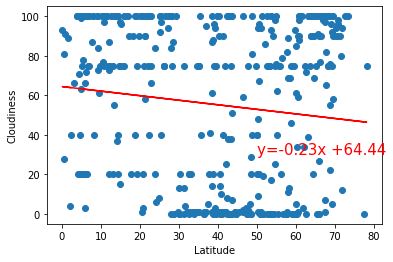

In [18]:
# Set x and y coordinates
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

plot_linear_regression(x_values, y_values, 'Cloudiness', (50,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.19544985566139791


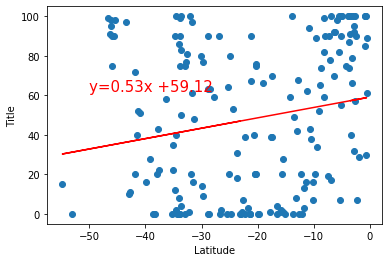

In [96]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,62))

###### As evident on the graph and in the r value the correlation is negligent interms of cloudiness and both southern and northern hemispheres. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.13650973929041754


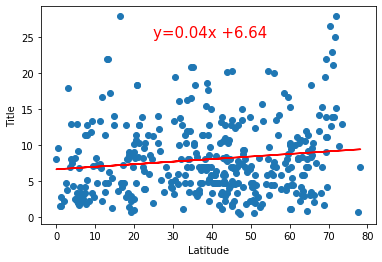

In [101]:
# Set x and y coordinates
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

plot_linear_regression(x_values, y_values, 'Wind Speed', (25,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.19512105771449328


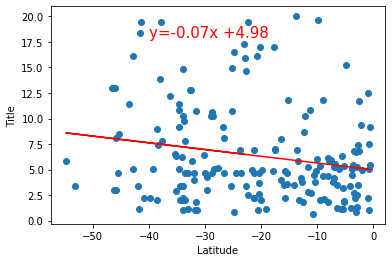

In [106]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

plot_linear_regression(x_values, y_values, 'Wind Speed', (-40,18))

###### As evident on the graph and in the r value the correlation is negligent interms of wind speed and both southern and northern hemispheres. 